# Here is my quick EDA approach that can be reused for any tabular dataset.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # drawing graph

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/learn-together/test.csv
/kaggle/input/learn-together/train.csv


# First step, we start with a quick look at the datasets:

In [2]:
train_df = pd.read_csv('/kaggle/input/learn-together/train.csv')
print("Size of Train dataframe is: {}".format(train_df.shape))
test_df =  pd.read_csv('/kaggle/input/learn-together/test.csv')
print("Size of Test dataframe is: {}".format(test_df.shape))

Size of Train dataframe is: (15120, 56)
Size of Test dataframe is: (565892, 55)


# Where is the target?

Simple, this is the only column present in the train dataset and absent from the test set.

In [3]:
def Diff(a,b):
    return(list(set(a)-set(b)))

train = train_df.columns
test = test_df.columns
target = Diff(train,test)
print('The target is',target[0])

The target is Cover_Type


# Let's see the target distribution:

In the train dataset, we can identify 7 classes (labels from 1 to 7).

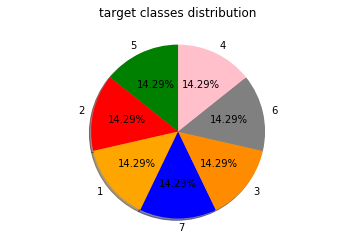

In [4]:
categories = train_df[target[0]].unique()
val = []
for i in categories:
    temp = len(train_df[train_df[target[0]]==i])
    val.append(temp)
labels=categories
sizes=val
colors=['green','red','orange','blue','darkorange','grey','pink']
plt.axis('equal')
plt.title('target classes distribution')
plt.pie(sizes, explode=(0,0,0,0,0,0,0), labels=labels,colors=colors,autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()                        

We see that target distribution is perfectly balanced.

# Now, let' look at Data categories:

There are several methods to detect categorical data...
Here i simply look at the amount of unique values if we have have the same unique values in the same train and test column, this is a categorical feature. If not, it's a continuous feature.  

In [5]:
print('We have following categorical features:')
print()
cat = []
cont = []
for i in test[1:]:
    temp1 = train_df[i].unique()
    temp2 = test_df[i].unique()
    if len(temp1) == len(temp2):
        print(i,':',len(temp1),'unique values')
        cat.append(i)
    else:
        cont.append(i)
print()
print('And we have',len(cont), 'of following continuous features:') 
print(cont)

We have following categorical features:

Aspect : 361 unique values
Wilderness_Area1 : 2 unique values
Wilderness_Area2 : 2 unique values
Wilderness_Area3 : 2 unique values
Wilderness_Area4 : 2 unique values
Soil_Type1 : 2 unique values
Soil_Type2 : 2 unique values
Soil_Type3 : 2 unique values
Soil_Type4 : 2 unique values
Soil_Type5 : 2 unique values
Soil_Type6 : 2 unique values
Soil_Type8 : 2 unique values
Soil_Type9 : 2 unique values
Soil_Type10 : 2 unique values
Soil_Type11 : 2 unique values
Soil_Type12 : 2 unique values
Soil_Type13 : 2 unique values
Soil_Type14 : 2 unique values
Soil_Type16 : 2 unique values
Soil_Type17 : 2 unique values
Soil_Type18 : 2 unique values
Soil_Type19 : 2 unique values
Soil_Type20 : 2 unique values
Soil_Type21 : 2 unique values
Soil_Type22 : 2 unique values
Soil_Type23 : 2 unique values
Soil_Type24 : 2 unique values
Soil_Type25 : 2 unique values
Soil_Type26 : 2 unique values
Soil_Type27 : 2 unique values
Soil_Type28 : 2 unique values
Soil_Type29 : 2 uniq

# Value distributions of continuous features in train dataset:

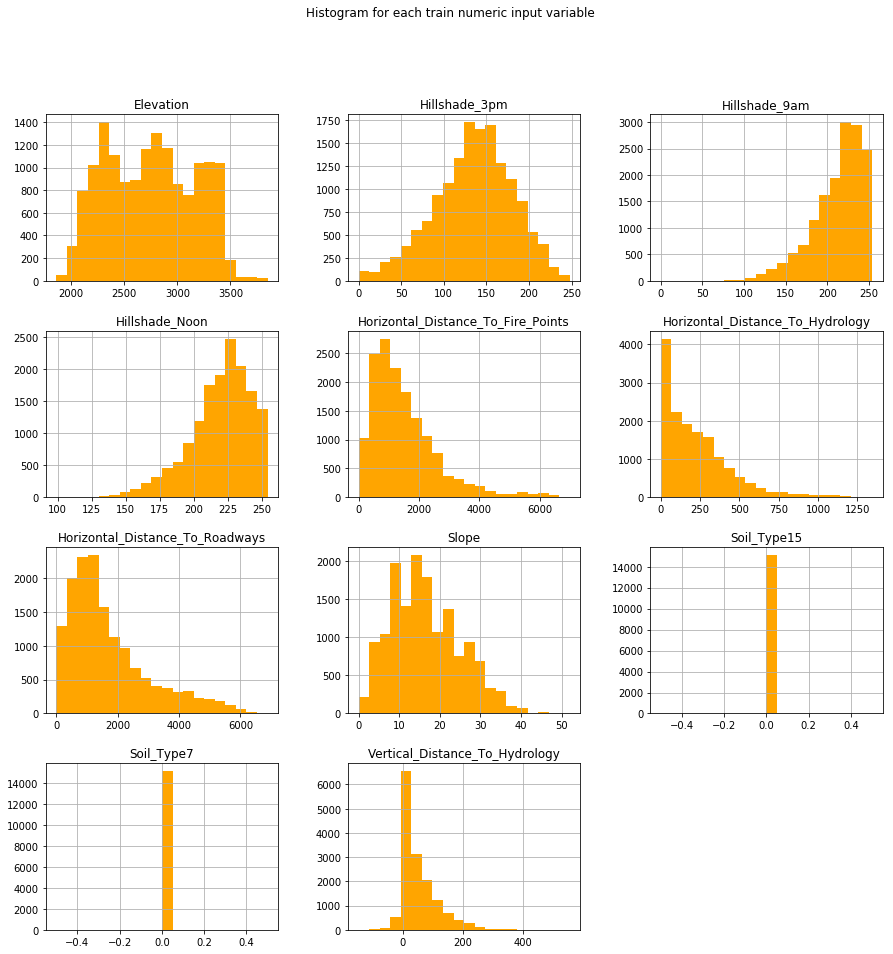

In [6]:
train_df[cont].hist(bins=20, figsize=(15,15), color = 'orange')
plt.suptitle("Histogram for each train numeric input variable")
plt.show()

# Value distributions of continuous features in test dataset:

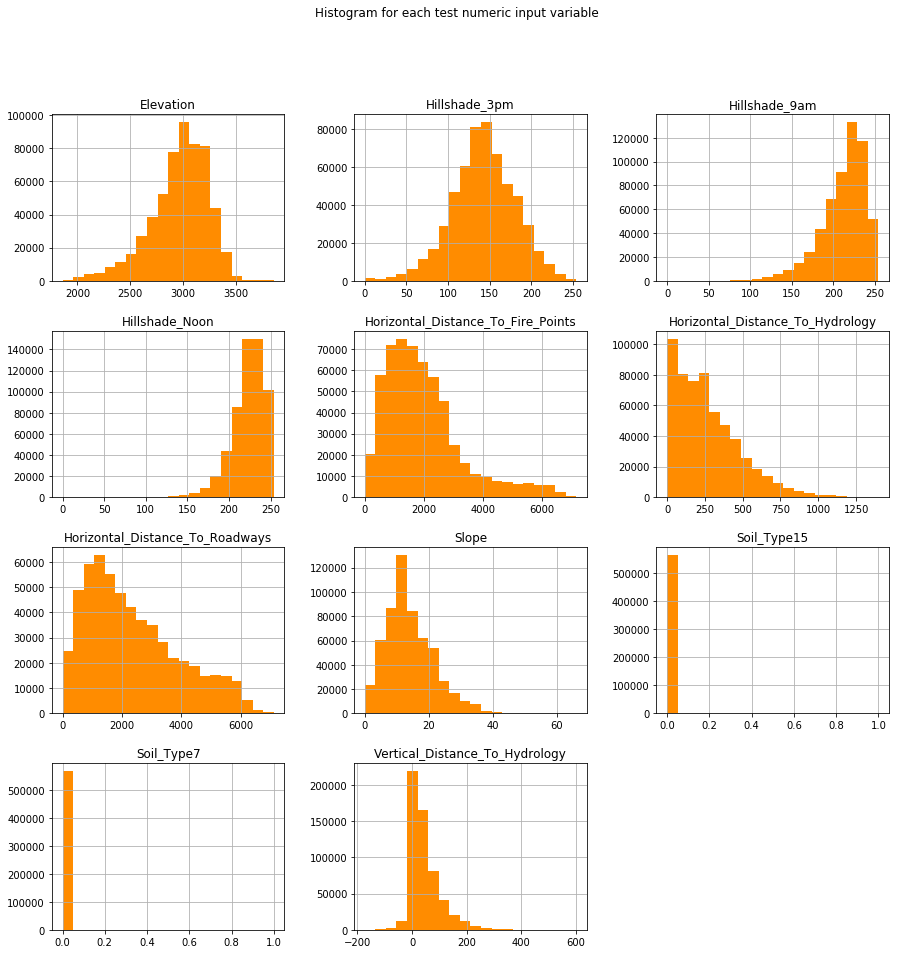

In [7]:
test_df[cont].hist(bins=20, figsize=(15,15), color = 'darkorange')
plt.suptitle("Histogram for each test numeric input variable")
plt.show()

# To be continued...